In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('colisoes.csv')

In [9]:
df['cumm_sum'] = df['count'].cumsum()
df["cumm_sum"][200]

In [10]:
df['count'].sum()

np.int64(9300)

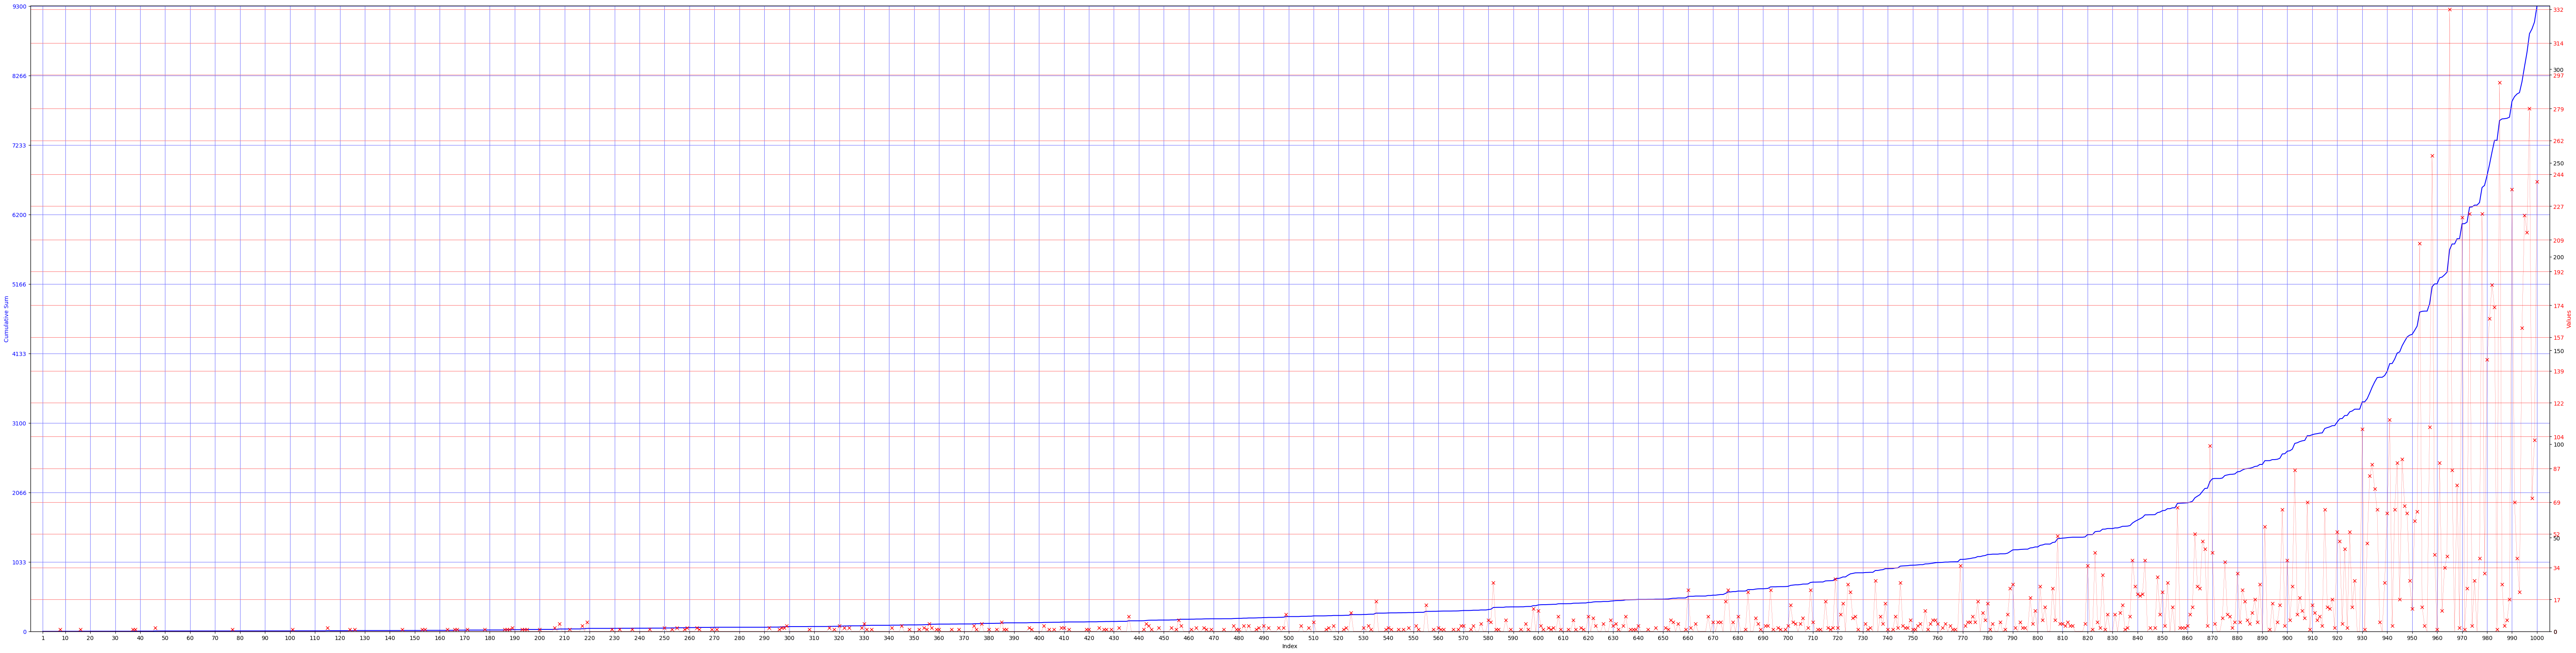

In [11]:
fig, ax1 = plt.subplots(figsize=(80, 20))

ax1.plot(df['collision'], df['cumm_sum'], label='Cumulative Sum', color='blue') # , marker='o'
ax1.set_xlabel('Index')
ax1.set_ylabel('Cumulative Sum', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xlim([df['collision'].min()-5, df['collision'].max() + 5])
ax1.set_ylim([df['cumm_sum'].min(), df['cumm_sum'].max() + 5])

ax2 = ax1.twinx()

ax2.plot(df.loc[(df['count'] != 0), 'collision'], df.loc[(df['count'] != 0), 'count'], label='Values', color='red', marker='x', linestyle='None')
ax2.set_ylabel('Values', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.set_ylim([df['count'].min(), df['count'].max() + 2])

ax3 = ax1.twinx()

ax3.plot(df['collision'], df['count'], label='Values', color='red', linestyle='solid', linewidth=0.2)
ax3.set_ylim([df['count'].min(), df['count'].max() + 2])

x_values = np.linspace(df['collision'].min(), df['collision'].max(), num=101, dtype=int)
ax1.set_xticks(x_values)

y1_values = np.linspace(df['cumm_sum'].min(), df['cumm_sum'].max(), num=10, dtype=int)
ax1.set_yticks(y1_values)

y2_values = np.linspace(df['count'].min(), df['count'].max(), num=20, dtype=int)
ax2.set_yticks(y2_values)

ax1.grid(color='#7777FF')
ax2.grid(color='#FF7777')

plt.savefig('collisions-per-insertion.svg', format='svg')

plt.show()